In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
abide = pd.read_csv('ABIDEII_Composite_Phenotypic.csv', encoding='latin', index_col='SUB_ID')
abide['label'] = abide['DX_GROUP'].apply(lambda x: 'Autisim' if x == 1 else 'Control')
abide.sample(n=5)

,SITE_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,...,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT,label
SUB_ID,,,,,,,,,,,,,,,,,,,,,
29232,ABIDEII-NYU_1,NaN,2,0.0,0.0,7.60400,1,1.0,72.72,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
29212,ABIDEII-NYU_1,NaN,1,1.0,NaN,34.76000,2,1.0,69.20,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autisim
29473,ABIDEII-KKI_1,NaN,2,0.0,NaN,8.89863,1,1.0,100.00,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
28881,ABIDEII-SDSU_1,NaN,2,NaN,0.0,8.10000,1,1.0,100.00,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
29016,ABIDEII-BNI_1,NaN,2,NaN,NaN,41.00000,1,1.0,NaN,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [3]:
df = pd.DataFrame()

hemi_dfs = []
for measure in ['thickness', 'meancurv']:
    for hemi in ['lh', 'rh']:
        df_buff = pd.read_csv(f'cortical_{measure}_{hemi}.csv', index_col=0)
        df_buff.index.names = ['subject_id']  # *.aparc.*
        hemi_dfs.append(df_buff)

df = pd.concat(hemi_dfs, axis='columns', sort=True)

label_series = abide['label'].reindex(df.index)
df = pd.concat([label_series, df], axis='columns', sort=True)

print(df.shape)
df.sample(5)

(92, 147)


,label,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,...,rh_superiorfrontal_meancurv,rh_superiorparietal_meancurv,rh_superiortemporal_meancurv,rh_supramarginal_meancurv,rh_frontalpole_meancurv,rh_temporalpole_meancurv,rh_transversetemporal_meancurv,rh_insula_meancurv,BrainSegVolNotVent,eTIV
subject_id,,,,,,,,,,,,,,,,,,,,,
29434,Autisim,2.813,2.745,2.520,2.043,3.213,2.863,2.852,3.164,2.627,...,0.126,0.119,0.109,0.126,0.167,0.138,0.149,0.122,1079370.0,1.284550e+06
29354,Control,2.861,2.662,2.664,2.208,3.033,2.980,2.727,2.902,2.550,...,0.136,0.122,0.114,0.123,0.177,0.142,0.130,0.119,1189091.0,1.426448e+06
28795,Autisim,3.035,3.041,2.884,2.252,4.299,3.020,2.809,3.101,2.694,...,0.132,0.133,0.108,0.115,0.167,0.131,0.119,0.131,1310608.0,1.657541e+06
29397,Control,3.157,2.907,2.761,2.647,3.351,3.236,2.986,3.095,2.631,...,0.124,0.122,0.104,0.130,0.172,0.167,0.151,0.130,1294804.0,1.553529e+06
28808,Autisim,2.700,3.144,2.892,2.043,3.155,2.965,2.799,3.018,2.406,...,0.122,0.118,0.101,0.125,0.163,0.134,0.120,0.114,1192338.0,1.466489e+06


In [4]:
df.to_csv('cortical_features.csv')

['lh_superiorfrontal_thickness', 'lh_superiorparietal_thickness', 'lh_superiortemporal_thickness', 'rh_superiorfrontal_thickness', 'rh_superiorparietal_thickness', 'rh_superiortemporal_thickness', 'lh_superiorfrontal_meancurv', 'lh_superiorparietal_meancurv', 'lh_superiortemporal_meancurv', 'rh_superiorfrontal_meancurv', 'rh_superiorparietal_meancurv', 'rh_superiortemporal_meancurv']


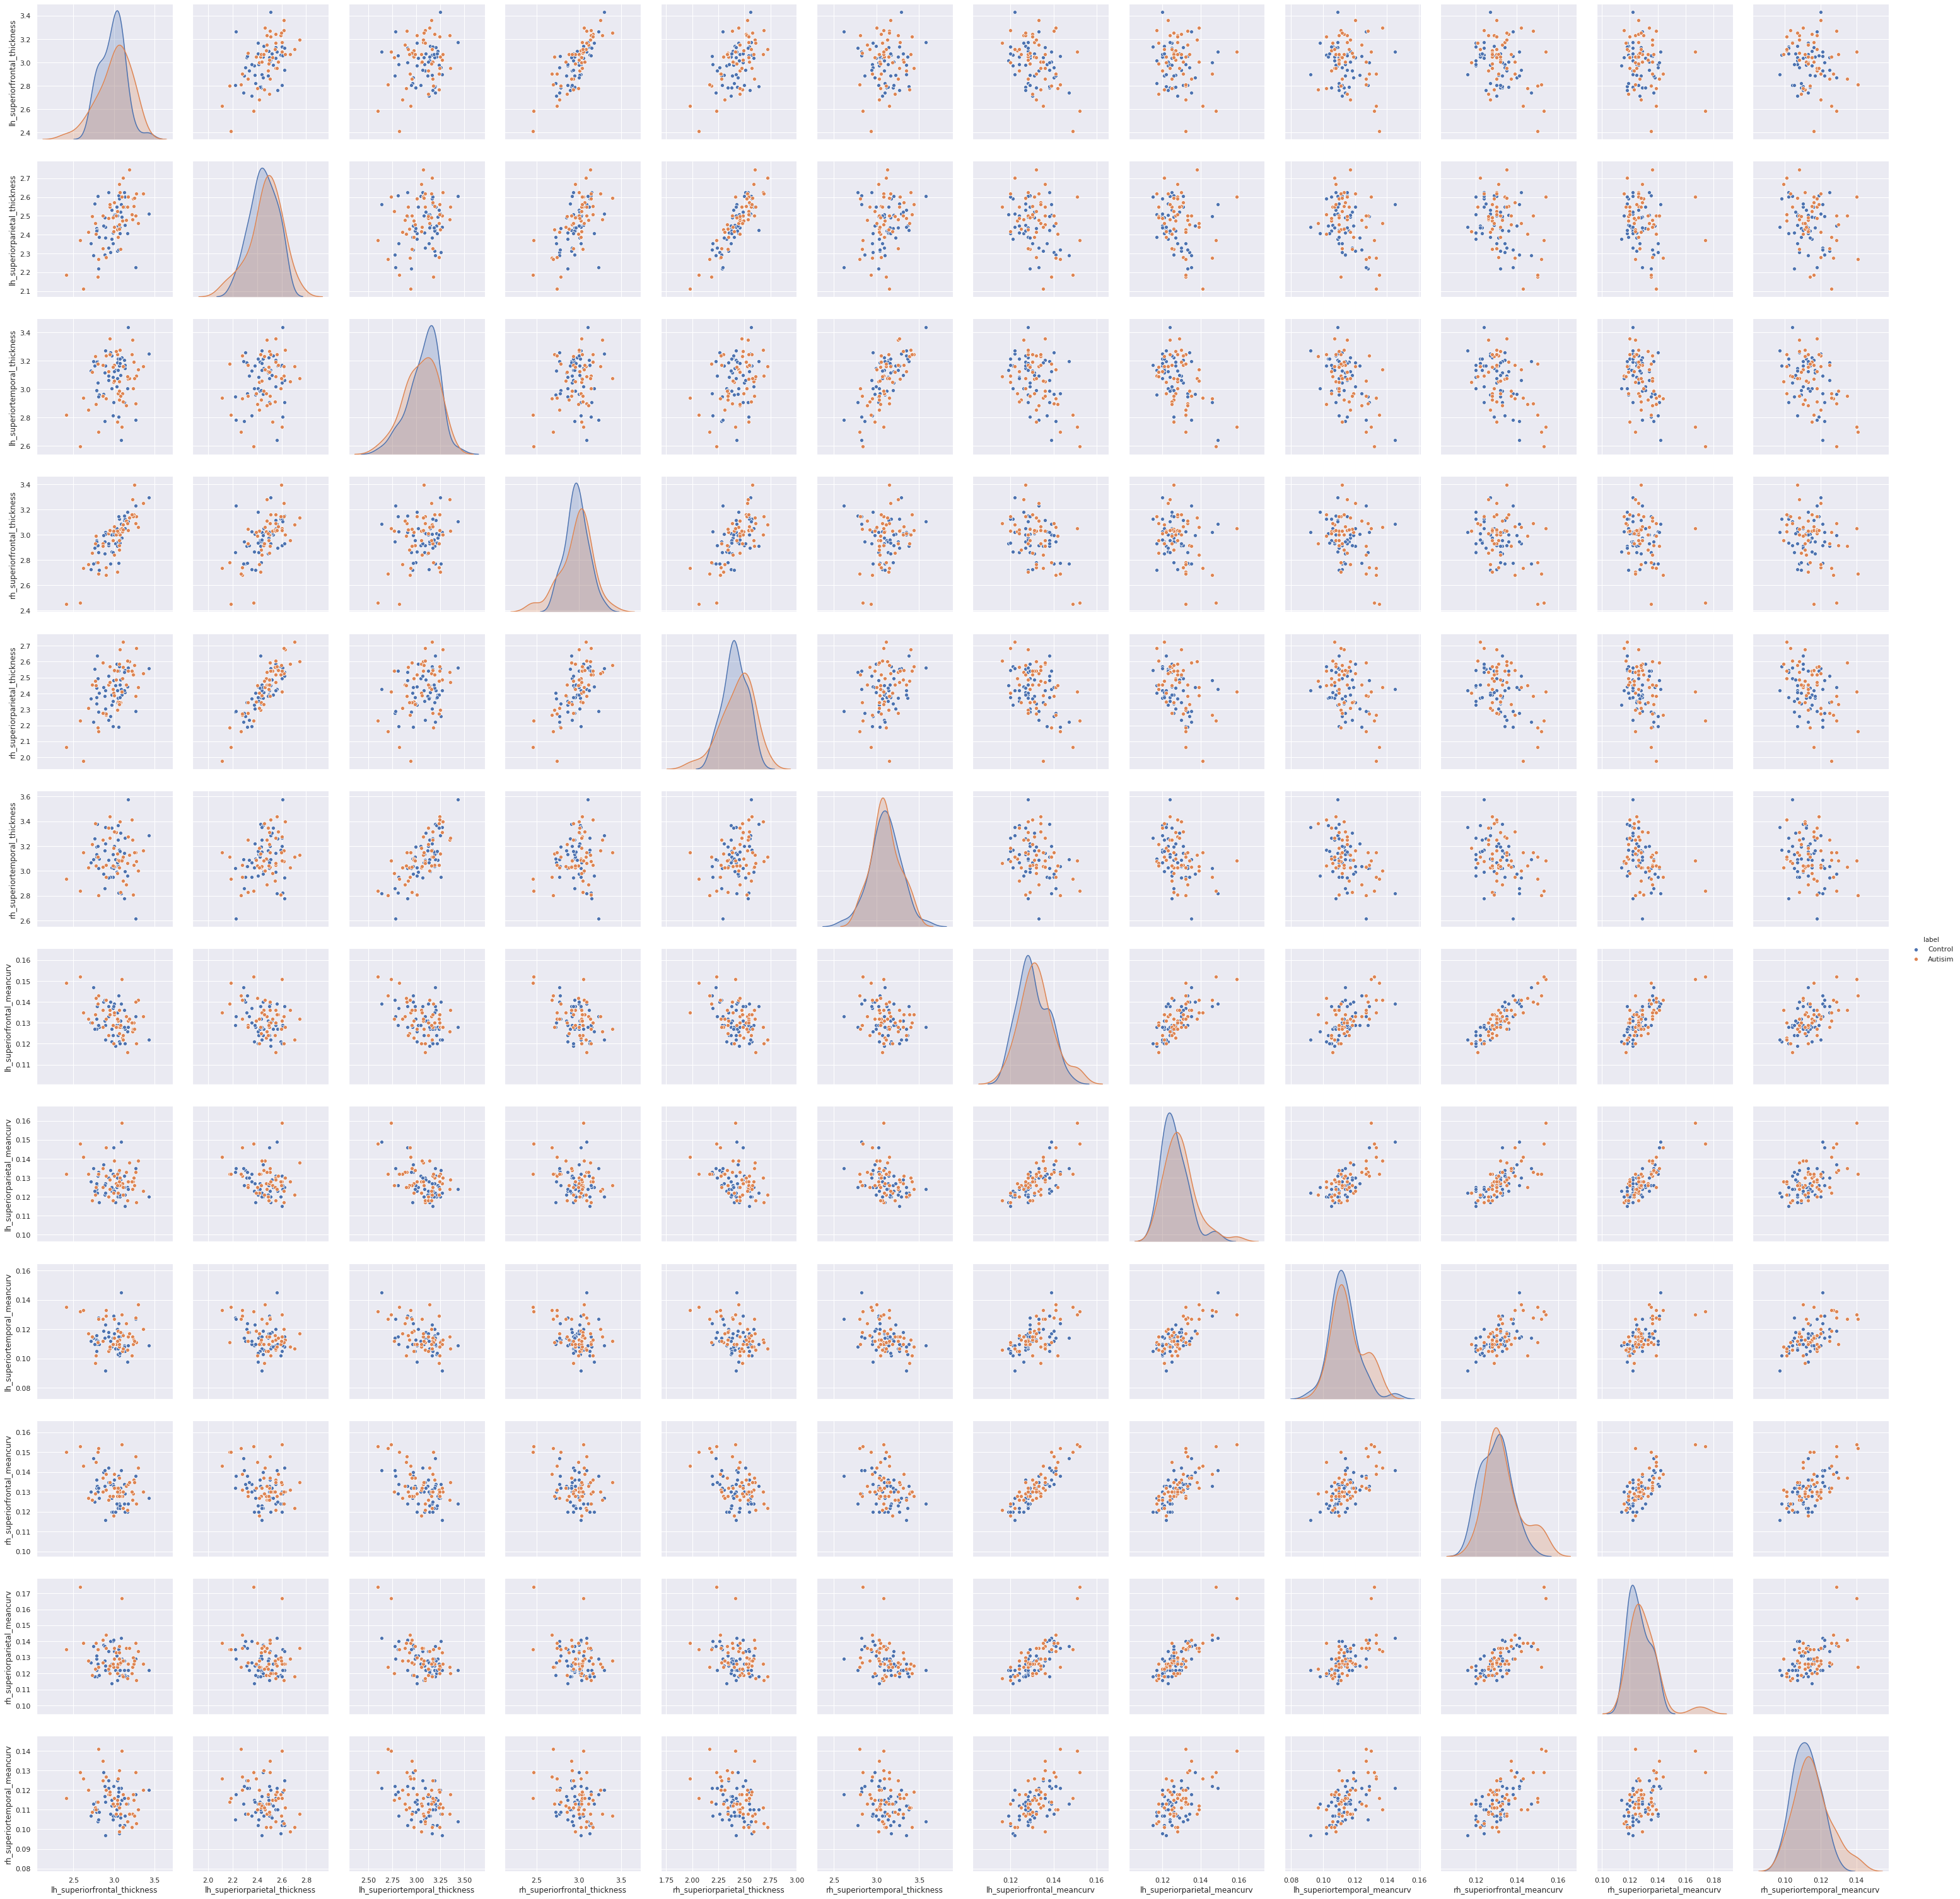

In [5]:
superior_rois = [c for c in df.columns if 'superior' in c]
print(superior_rois)

sns.pairplot(data=df, 
             vars=superior_rois, 
             diag_kind='kde',
             hue='label',
             height=3.5)
plt.show()